# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [253]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

ADF Statistic: -12.893436
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


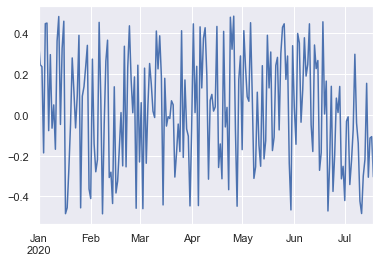

In [255]:
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [256]:
rho_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0, 1.2, 1.5]
for i in rho_values:
    
    ts1 = ts(rho=i)
    #ts1.plot()
    result = adfuller(ts1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.356619
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -11.043488
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -4.677061
p-value: 0.000093
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -6.120240
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
ADF Statistic: -9.332852
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -8.395555
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -5.056273
p-value: 0.000017
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -4.643368
p-value: 0.000107
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -2.869237
p-value: 0.049044
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -1.212241
p-value: 0.668308
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: 1142691565448

Pueba de hpótesis de Dickey fuller

Ho: la serie es no estacionaria

Ha: La series es estacionaria

Como se observa en la prueba a partir de Rho >= 0.9 la series es no estacionaria. 



# 02.2 Download and explore one series from google trends

Se analizan los datos mensuales de compras vs felicidad desde el año 2004. 



In [37]:
data = pd.read_csv('multiTimeline2.csv', header =1)

In [44]:
data.columns = ['tiempo', 'compras', 'felicidad']

In [45]:
data.head()

,tiempo,compras,felicidad
0,2004-01-01,43,8
1,2004-02-01,44,8
2,2004-03-01,42,6
3,2004-04-01,44,7
4,2004-05-01,44,8


In [46]:
data.tiempo = pd.to_datetime(data.tiempo)
data.set_index('tiempo', inplace=True)

data.head()

,compras,felicidad
tiempo,,
2004-01-01,43,8
2004-02-01,44,8
2004-03-01,42,6
2004-04-01,44,7
2004-05-01,44,8


In [48]:
data1 = data[['compras']]

In [49]:
data2 = data[['felicidad']]

In [50]:
data1.head()

,compras
tiempo,
2004-01-01,43
2004-02-01,44
2004-03-01,42
2004-04-01,44
2004-05-01,44


In [51]:
data2.head()

,felicidad
tiempo,
2004-01-01,8
2004-02-01,8
2004-03-01,6
2004-04-01,7
2004-05-01,8


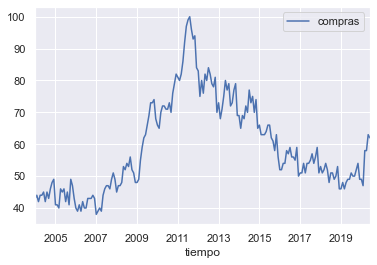

In [52]:
data1.plot()

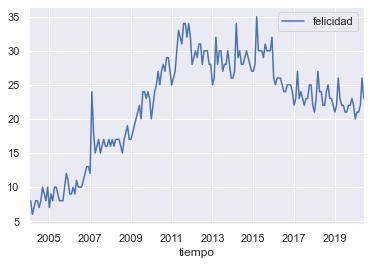

In [53]:
data2.plot()

# Verificando estacionariedad

In [54]:
result = adfuller(data1.compras)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.939588
p-value: 0.313673
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [55]:
result = adfuller(data2.felicidad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.175370
p-value: 0.215306
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Prueba de hipótesis de Dickey Fuller

Ho: La serie temporal tiene raíz unitaria, lo que significa que no es estacionaria. Tiene alguna estructura dependiente del tiempo.

Ha: La series es estacionaria

Dado que el p-valor que acompaña a estadístico de Dickey Fuller para las variables compras y felicidad es mayor a 5% entonces  no rechaza la hipótesis nula y se concluye que las series son no estacionarias. 

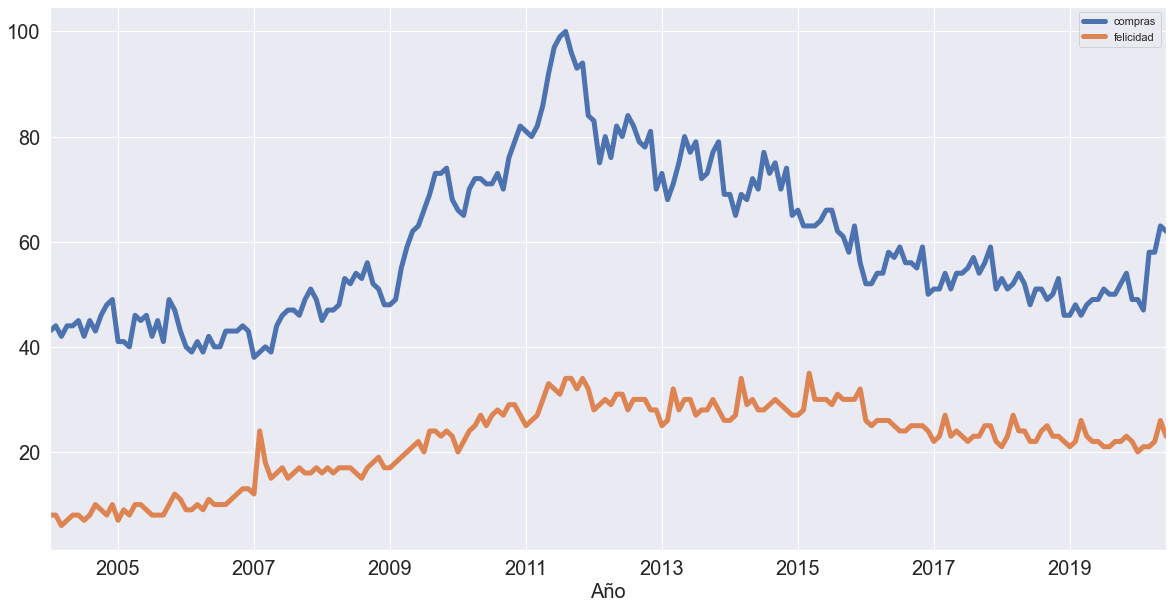

In [56]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Año', fontsize=20);

# Estacionalidad y tendencia

se presenta el promedio movil de la serie muertes para suavizarla, utilizando un periodo de 12 meses y 3 meses para compras t felicidad, respectivamente.

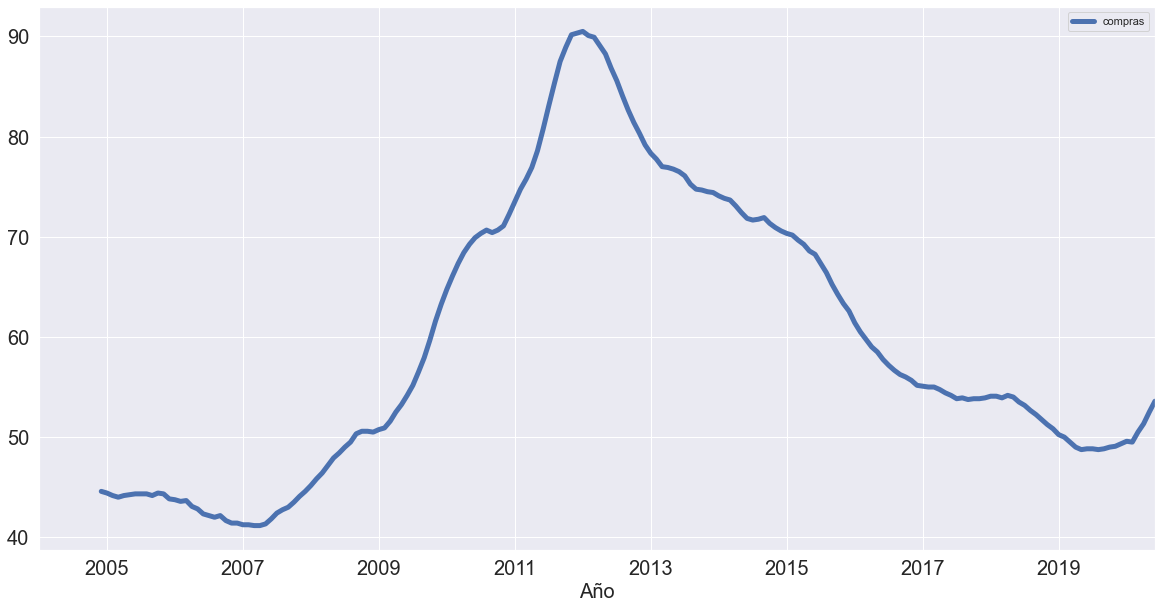

In [60]:
compras = data[['compras']]
compras.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Año', fontsize=20);

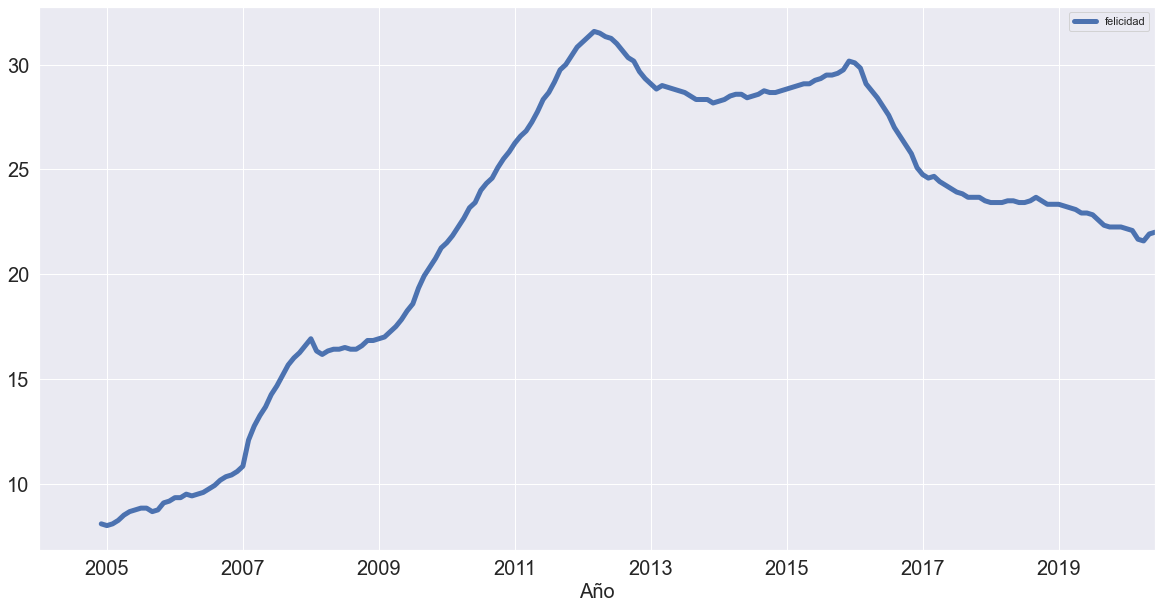

In [61]:
felicidad = data[['felicidad']]
felicidad.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Año', fontsize=20);

Se trazan las series de tiempo en una misma gráfica pero no se obseva un suavizamiento claro en ninguna de ellas con el método de promedio movil

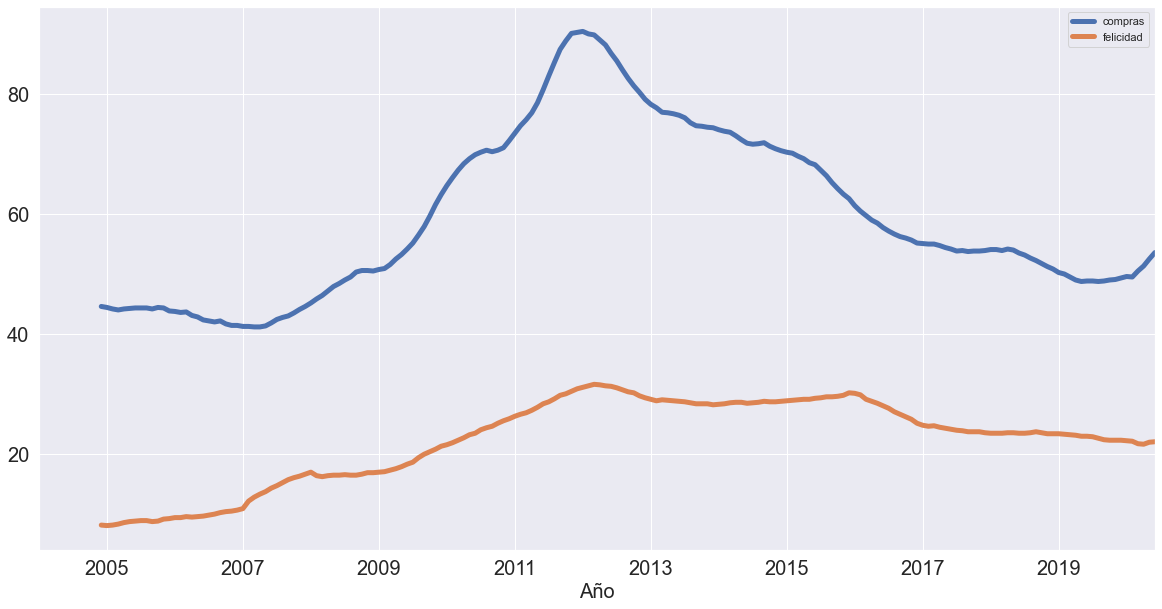

In [63]:
data[['compras', 'felicidad']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Año', fontsize=20);

# Primera diferencia y estacionariedad

Para buscar la estacionariedad de la serie de la variable felicidad se cálcula la primera diferencia, la cual como se muestra en el gráfico elimina cualquier tendencia a lo largo de los meses. 

En la prueba de Dickey - Fuller se aprecia que luego de esta difenciación la variable felicidad es estacionaria con p-valor cercano a cero. 

No obstante, en el caso de la variable compras, se aprecia que la primera diferencia no es suficiente para estacionalizar la serie, ya que el p-valor asociado a la prueba de Dickey-fuller es de 7.6%. 

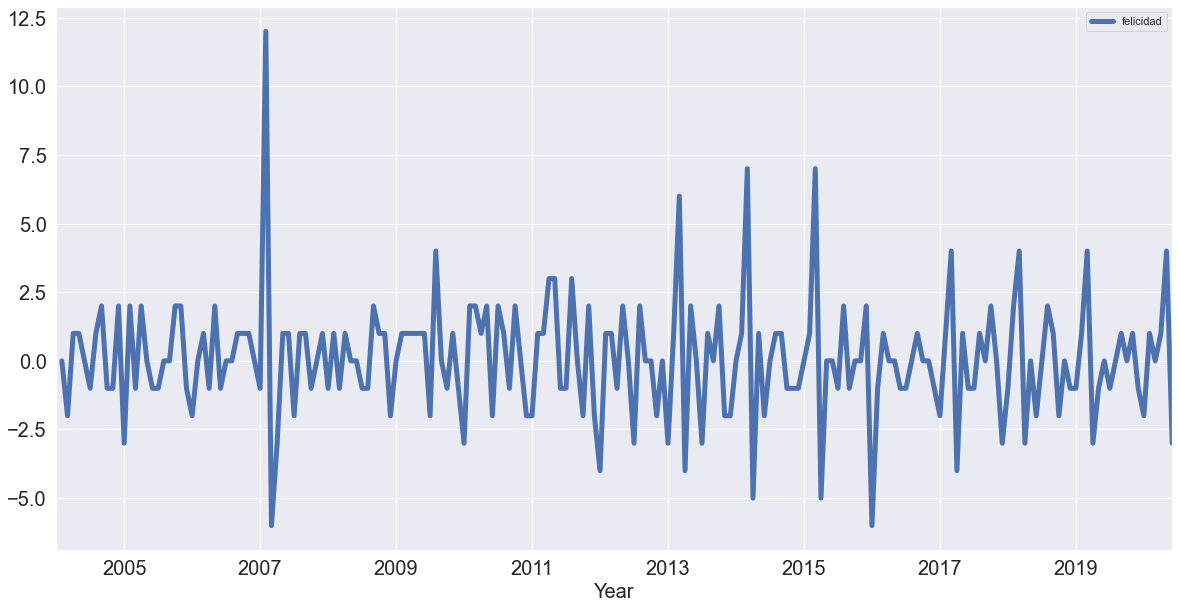

In [64]:
felicidad.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [65]:
result = adfuller(data['felicidad'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.860404
p-value: 0.002346
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


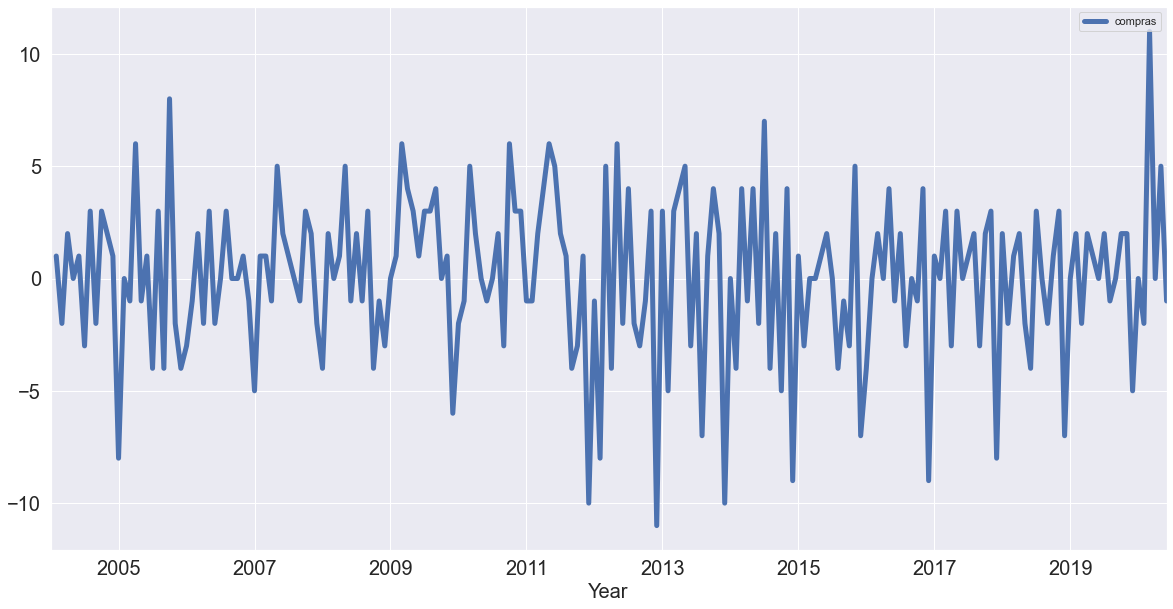

In [66]:
compras.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [67]:
result = adfuller(data['compras'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.686574
p-value: 0.076390
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


# Correlación

Las variables compras y felicidad  tienen una correlación positiva y muy alta de 0.79



In [80]:
data.corr()

,compras,felicidad
compras,1.000000,0.796477
felicidad,0.796477,1.000000


Ahora, se grafican las variables diferenciadas y se realiza el cálculo de la correlación entre ambas variables, observando que la correlación contrario a lo esperado disminuyó pasando de 0.76 a 0.23.

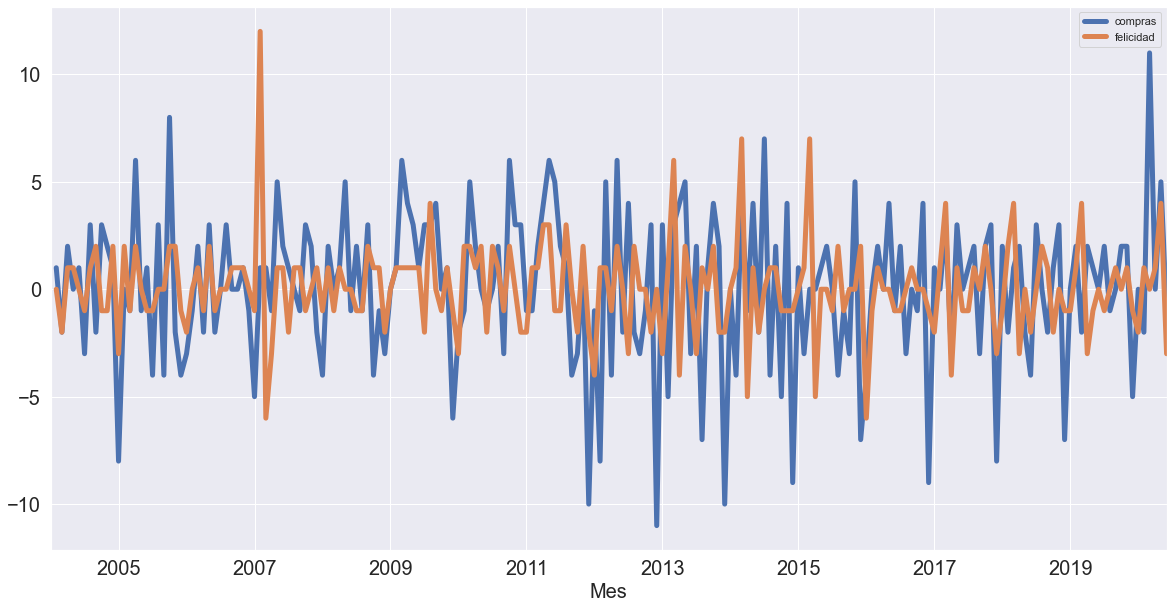

In [81]:
data[['compras', 'felicidad']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Mes', fontsize=20);  

In [82]:
data[['compras', 'felicidad']].diff().corr()

,compras,felicidad
compras,1.000000,0.235932
felicidad,0.235932,1.000000
